In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
sns.set()

In [2]:
# Data set das cervejas e características delas
df_cervejas=pd.read_csv('cervejas_v2.csv')

In [3]:
def EDA (df):
    df= df.rename(columns=str.lower)

    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    colunas = sorted(df.columns.str.lower().tolist(), reverse=False)
    
    eda_df['Mean'] = np.round(df.mean(), 2)
    eda_df['Median'] = np.round(df.median(), 2)
    
    eda_df['Max'] = df.max()
    eda_df['Min'] = df.min()
    eda_df['STD'] = np.round(df.std(), 2)
    
    eda = pd.DataFrame(eda_df)
    
    eda['Amount_Unique'] = list(map(lambda x: len(df[x].unique().tolist()), colunas))

    return eda

In [4]:
EDA (df_cervejas)

,Amount_NaN,%_NaN,DType,Amount_Data,Mean,Median,Max,Min,STD,Amount_Unique
abv,0,0.00,object,534,NaN,NaN,9.7% ABV,0% ABV,NaN,70
aparencia,0,0.00,object,534,NaN,NaN,5/5 (98),2/5 (103),NaN,302
aroma,0,0.00,object,534,NaN,NaN,9/10 (80),2/10 (103),NaN,399
cervejaria,2,0.00,object,532,NaN,NaN,NaN,NaN,NaN,167
conjunto,0,0.00,object,534,NaN,NaN,9/10 (98),2/10 (80),NaN,371
copo_ideal,216,0.40,object,318,NaN,NaN,NaN,NaN,NaN,15
descricao,0,0.00,object,534,NaN,NaN,"“I’ve had bitter from 11 different countries, ...",THEREZÓPOLIS RUBINE é uma autêntica Bock de ...,NaN,502
estilo,0,0.00,object,534,NaN,NaN,Wood Aged Beer,Altbier,NaN,79
ibu,456,0.85,float64,78,41.46,33.0,150,1,28.03,39
nome_cerva,0,0.00,object,534,NaN,NaN,Áustria Hefe Weizen,1500,NaN,528


In [5]:
# 1- nota-se que IBU e copo_ideal possuem mais dados NaN do que de fato dados preenchidos
# 2- o rating_geral na realidade é uma ponderação dos outros ratings, logo podemos removê-lo (será uma combinação linear das outras features)
# 3 - unnamed: 0 não serve pra nada, vamos remover também

df_cervejas = df_cervejas.drop(columns=['IBU',"Copo_Ideal","Rating_Geral","Unnamed: 0"])

In [6]:
#aula 54: clusterização com base nas características das cervejas (features)

In [7]:
df_cervejas.head()

,ABV,Aparencia,Aroma,Cervejaria,Conjunto,Descricao,Estilo,Nome_Cerva,Sabor,Sazonalidade,Sensacao,Temperatura
0,5% ABV,3/5 (817),6/10 (817),Cervejaria Heineken,7/10 (817),A Heineken é uma das mais famosas cervejas ven...,Premium American Lager,Heineken,12/20 (817),Não é sazonal,3/5 (817),5-7 °C
1,4.9% ABV,4/5 (609),7/10 (609),Brouwerij Hoegaarden,8/10 (609),A Hoegaarden contém ingredientes especiais com...,Witbier,Hoegaarden,15/20 (609),Não é sazonal,4/5 (609),5-7 °C
2,4.8% ABV,3/5 (426),5/10 (426),Cervejaria Sudbrack,6/10 (426),A Eisenbahn Pilsen foi desenvolvida para agrad...,Premium American Lager,Eisenbahn Pilsen,11/20 (426),Não é sazonal,3/5 (426),0-4 °C
3,5% ABV,3/5 (357),4/10 (357),AmBev,5/10 (357),"Ao longo de 150 anos, a Bohemia têm sido fiel ...",Standard American Lager,Bohemia,9/20 (357),Não é sazonal,3/5 (357),0-4 °C
4,5.5% ABV,3/5 (306),4/10 (306),AmBev,5/10 (306),A Serramalte é uma cerveja brasileira do estil...,Standard American Lager,Serramalte,10/20 (306),Não é sazonal,3/5 (306),0-4 °C


In [8]:
df_cervejas[['Nota_Aparencia', 'Max_Aparencia']] = df_cervejas.Aparencia.str.split("/", n=2, expand=True)
df_cervejas[['Nota_Aroma', 'Max_Aroma']] = df_cervejas.Aroma.str.split("/", n=2, expand=True)
df_cervejas[['Nota_Sensacao', 'Max_Sensacao']] = df_cervejas.Sensacao.str.split("/", n=2, expand=True)
df_cervejas[['Nota_Conjunto', 'Max_Conjunto']] = df_cervejas.Conjunto.str.split("/", n=2, expand=True)
df_cervejas[['Nota_Sabor', 'Max_Sabor']] = df_cervejas.Sabor.str.split("/", n=2, expand=True)
df_cervejas[['Temperatura_inf_Cerveja', 'Temperatura_']] = df_cervejas.Temperatura.str.split("-", n=2, expand=True)
df_cervejas[['Temperatura_sup_Cerveja', 'Temperatura__']] = df_cervejas.Temperatura_.str.split(" ", n=2, expand=True)
df_cervejas[['ABV', '%ABV']] = df_cervejas.ABV.str.split("%", n=2, expand=True)

In [9]:
df_cervejas.head()

,ABV,Aparencia,Aroma,Cervejaria,Conjunto,Descricao,Estilo,Nome_Cerva,Sabor,Sazonalidade,...,Max_Sensacao,Nota_Conjunto,Max_Conjunto,Nota_Sabor,Max_Sabor,Temperatura_inf_Cerveja,Temperatura_,Temperatura_sup_Cerveja,Temperatura__,%ABV
0,5,3/5 (817),6/10 (817),Cervejaria Heineken,7/10 (817),A Heineken é uma das mais famosas cervejas ven...,Premium American Lager,Heineken,12/20 (817),Não é sazonal,...,5 (817),7,10 (817),12,20 (817),5,7 °C,7,°C,ABV
1,4.9,4/5 (609),7/10 (609),Brouwerij Hoegaarden,8/10 (609),A Hoegaarden contém ingredientes especiais com...,Witbier,Hoegaarden,15/20 (609),Não é sazonal,...,5 (609),8,10 (609),15,20 (609),5,7 °C,7,°C,ABV
2,4.8,3/5 (426),5/10 (426),Cervejaria Sudbrack,6/10 (426),A Eisenbahn Pilsen foi desenvolvida para agrad...,Premium American Lager,Eisenbahn Pilsen,11/20 (426),Não é sazonal,...,5 (426),6,10 (426),11,20 (426),0,4 °C,4,°C,ABV
3,5,3/5 (357),4/10 (357),AmBev,5/10 (357),"Ao longo de 150 anos, a Bohemia têm sido fiel ...",Standard American Lager,Bohemia,9/20 (357),Não é sazonal,...,5 (357),5,10 (357),9,20 (357),0,4 °C,4,°C,ABV
4,5.5,3/5 (306),4/10 (306),AmBev,5/10 (306),A Serramalte é uma cerveja brasileira do estil...,Standard American Lager,Serramalte,10/20 (306),Não é sazonal,...,5 (306),5,10 (306),10,20 (306),0,4 °C,4,°C,ABV


In [10]:
df_cervejas.drop(columns=['Max_Aparencia', 'Max_Sensacao', 'Max_Conjunto', 'Max_Sabor', 'Max_Aroma','Aroma', 'Aparencia', 'Conjunto', 'Sabor', 'Sensacao','Temperatura_', 'Temperatura__', 'Temperatura', '%ABV'], inplace=True)

In [11]:
df_cervejas.head().T

,0,1,2,3,4
ABV,5,4.9,4.8,5,5.5
Cervejaria,Cervejaria Heineken,Brouwerij Hoegaarden,Cervejaria Sudbrack,AmBev,AmBev
Descricao,A Heineken é uma das mais famosas cervejas ven...,A Hoegaarden contém ingredientes especiais com...,A Eisenbahn Pilsen foi desenvolvida para agrad...,"Ao longo de 150 anos, a Bohemia têm sido fiel ...",A Serramalte é uma cerveja brasileira do estil...
Estilo,Premium American Lager,Witbier,Premium American Lager,Standard American Lager,Standard American Lager
Nome_Cerva,Heineken,Hoegaarden,Eisenbahn Pilsen,Bohemia,Serramalte
Sazonalidade,Não é sazonal,Não é sazonal,Não é sazonal,Não é sazonal,Não é sazonal
Nota_Aparencia,3,4,3,3,3
Nota_Aroma,6,7,5,4,4
Nota_Sensacao,3,4,3,3,3
Nota_Conjunto,7,8,6,5,5


In [12]:
#entendo que as notas não precisam ser normalizadas pq apesar de terem denominadores diferentes, estamos interessados nos deltas
#nomes da cerveja não vão ser úteis para a clusterização inicial, vamos removê-las. Assim como descrição e cervejaria

df_cervejas.drop(columns=['Nome_Cerva',"Descricao","Cervejaria"], inplace=True)


In [13]:
df_cervejas["Estilo"].value_counts()
#temos quase 79 estilos diferentes, vamos tirar da clusterização
df_cervejas.drop(columns=["Estilo"], inplace=True)

In [14]:
df_cervejas["Sazonalidade"].value_counts()

Não é sazonal        494
Outros                13
Comemorativa           9
Inverno                7
Colaborativa           3
Natal (Christmas)      3
Oktoberfest            2
Anual/Safrada          1
Outono                 1
Verão                  1
Name: Sazonalidade, dtype: int64

In [15]:
sazonal=pd.get_dummies(df_cervejas["Sazonalidade"])
df_cervejas=pd.concat([df_cervejas,sazonal],axis=1)
df_cervejas=df_cervejas.drop(["Sazonalidade"], axis=1)
df_cervejas.head()

,ABV,Nota_Aparencia,Nota_Aroma,Nota_Sensacao,Nota_Conjunto,Nota_Sabor,Temperatura_inf_Cerveja,Temperatura_sup_Cerveja,Anual/Safrada,Colaborativa,Comemorativa,Inverno,Natal (Christmas),Não é sazonal,Oktoberfest,Outono,Outros,Verão
0,5,3,6,3,7,12,5,7,0,0,0,0,0,1,0,0,0,0
1,4.9,4,7,4,8,15,5,7,0,0,0,0,0,1,0,0,0,0
2,4.8,3,5,3,6,11,0,4,0,0,0,0,0,1,0,0,0,0
3,5,3,4,3,5,9,0,4,0,0,0,0,0,1,0,0,0,0
4,5.5,3,4,3,5,10,0,4,0,0,0,0,0,1,0,0,0,0


In [16]:
df_cervejas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ABV                      534 non-null    object
 1   Nota_Aparencia           534 non-null    object
 2   Nota_Aroma               534 non-null    object
 3   Nota_Sensacao            534 non-null    object
 4   Nota_Conjunto            534 non-null    object
 5   Nota_Sabor               534 non-null    object
 6   Temperatura_inf_Cerveja  531 non-null    object
 7   Temperatura_sup_Cerveja  531 non-null    object
 8   Anual/Safrada            534 non-null    uint8 
 9   Colaborativa             534 non-null    uint8 
 10  Comemorativa             534 non-null    uint8 
 11  Inverno                  534 non-null    uint8 
 12  Natal (Christmas)        534 non-null    uint8 
 13  Não é sazonal            534 non-null    uint8 
 14  Oktoberfest              534 non-null    u

In [17]:
#Transformar tudo em dados numéricos


df_cervejas['Nota_Aparencia'] = pd.to_numeric(df_cervejas['Nota_Aparencia'])
df_cervejas['ABV'] = pd.to_numeric(df_cervejas['ABV'])
df_cervejas['Nota_Aroma'] = pd.to_numeric(df_cervejas['Nota_Aroma'])
df_cervejas['Nota_Sensacao']= pd.to_numeric(df_cervejas['Nota_Sensacao'])
df_cervejas['Nota_Conjunto'] = pd.to_numeric(df_cervejas['Nota_Conjunto'])
df_cervejas['Nota_Sabor'] = pd.to_numeric(df_cervejas['Nota_Sabor'])
df_cervejas['Temperatura_inf_Cerveja'] = pd.to_numeric(df_cervejas['Temperatura_inf_Cerveja'])
df_cervejas['Temperatura_sup_Cerveja'] = pd.to_numeric(df_cervejas['Temperatura_sup_Cerveja'])
df_cervejas['Anual/Safrada'] = pd.to_numeric(df_cervejas['Anual/Safrada'])
df_cervejas['Colaborativa'] = pd.to_numeric(df_cervejas['Colaborativa'])
df_cervejas['Comemorativa'] = pd.to_numeric(df_cervejas['Comemorativa'])
df_cervejas['Inverno'] = pd.to_numeric(df_cervejas['Inverno'])
df_cervejas['Natal (Christmas)'] = pd.to_numeric(df_cervejas['Natal (Christmas)'])
df_cervejas['Não é sazonal'] = pd.to_numeric(df_cervejas['Não é sazonal'])
df_cervejas['Oktoberfest'] = pd.to_numeric(df_cervejas['Oktoberfest'])
df_cervejas['Outono'] = pd.to_numeric(df_cervejas['Outono'])
df_cervejas['Outros'] = pd.to_numeric(df_cervejas['Outros'])
df_cervejas['Verão'] = pd.to_numeric(df_cervejas['Verão'])

In [18]:
df_cervejas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ABV                      534 non-null    float64
 1   Nota_Aparencia           534 non-null    int64  
 2   Nota_Aroma               534 non-null    int64  
 3   Nota_Sensacao            534 non-null    int64  
 4   Nota_Conjunto            534 non-null    int64  
 5   Nota_Sabor               534 non-null    int64  
 6   Temperatura_inf_Cerveja  531 non-null    float64
 7   Temperatura_sup_Cerveja  531 non-null    float64
 8   Anual/Safrada            534 non-null    uint8  
 9   Colaborativa             534 non-null    uint8  
 10  Comemorativa             534 non-null    uint8  
 11  Inverno                  534 non-null    uint8  
 12  Natal (Christmas)        534 non-null    uint8  
 13  Não é sazonal            534 non-null    uint8  
 14  Oktoberfest              5

In [19]:
#precisamos lembrar que a temperatura tinha alguns valores zerados. Como podemos preenchê-los?

df_cervejas.loc[df_cervejas['Temperatura_inf_Cerveja'].isnull(), ]

,ABV,Nota_Aparencia,Nota_Aroma,Nota_Sensacao,Nota_Conjunto,Nota_Sabor,Temperatura_inf_Cerveja,Temperatura_sup_Cerveja,Anual/Safrada,Colaborativa,Comemorativa,Inverno,Natal (Christmas),Não é sazonal,Oktoberfest,Outono,Outros,Verão
245,6.9,4,7,4,7,15,NaN,NaN,0,0,0,0,0,1,0,0,0,0
451,4.0,3,5,3,5,10,NaN,NaN,0,0,0,0,0,1,0,0,0,0
491,6.3,4,8,4,8,15,NaN,NaN,0,0,0,0,0,1,0,0,0,0


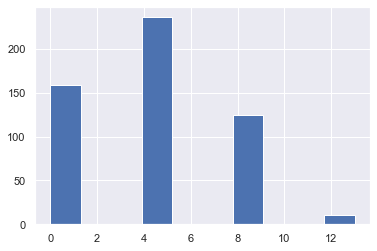

In [20]:
inf = df_cervejas['Temperatura_inf_Cerveja'].hist()

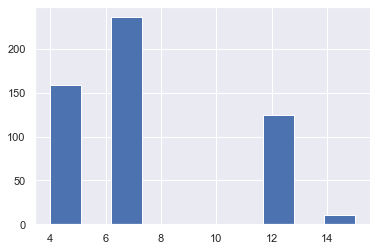

In [21]:
sup = df_cervejas['Temperatura_sup_Cerveja'].hist()

In [22]:
df_cervejas["Temperatura_inf_Cerveja"].fillna(df_cervejas["Temperatura_inf_Cerveja"].median(),inplace=True)
df_cervejas["Temperatura_sup_Cerveja"].fillna(df_cervejas["Temperatura_sup_Cerveja"].median(),inplace=True)

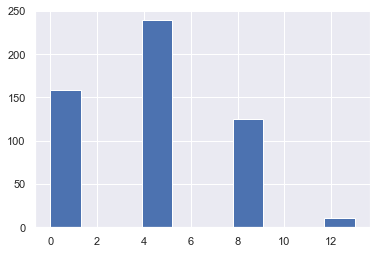

In [23]:
inf = df_cervejas['Temperatura_inf_Cerveja'].hist()

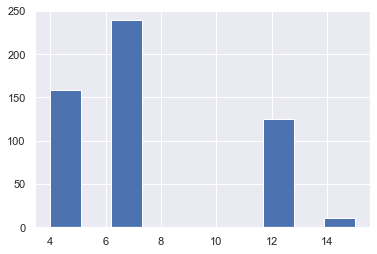

In [24]:
sup = df_cervejas['Temperatura_sup_Cerveja'].hist()

In [25]:
#As variáveis são ortogonais?
df_cervejas.corr()

,ABV,Nota_Aparencia,Nota_Aroma,Nota_Sensacao,Nota_Conjunto,Nota_Sabor,Temperatura_inf_Cerveja,Temperatura_sup_Cerveja,Anual/Safrada,Colaborativa,Comemorativa,Inverno,Natal (Christmas),Não é sazonal,Oktoberfest,Outono,Outros,Verão
ABV,1.000000,0.485765,0.573614,0.540578,0.560356,0.580012,0.503265,0.515800,0.090417,0.044444,0.069256,0.131577,0.054284,-0.221205,0.000707,-0.023802,0.162711,-0.023802
Nota_Aparencia,0.485765,1.000000,0.805201,0.769399,0.834873,0.837983,0.539864,0.484524,0.034447,0.059777,0.057674,0.091657,-0.020225,-0.112725,-0.049128,0.034447,0.048026,0.034447
Nota_Aroma,0.573614,0.805201,1.000000,0.853607,0.933517,0.959657,0.589506,0.524894,0.055998,0.063259,0.051113,0.104424,0.012385,-0.141579,-0.003730,0.055998,0.056183,-0.002635
Nota_Sensacao,0.540578,0.769399,0.853607,1.000000,0.858545,0.880496,0.523714,0.488741,0.044837,0.077805,0.068144,0.043035,0.000435,-0.118808,-0.031202,0.044837,0.069705,-0.022043
Nota_Conjunto,0.560356,0.834873,0.933517,0.858545,1.000000,0.963832,0.570533,0.513985,0.049175,0.066900,0.063017,0.094503,-0.006835,-0.129397,0.024498,0.017307,0.036295,0.017307
Nota_Sabor,0.580012,0.837983,0.959657,0.880496,0.963832,1.000000,0.597538,0.537503,0.062963,0.058080,0.046690,0.100266,-0.001629,-0.120579,0.005629,0.018723,0.035186,0.018723
Temperatura_inf_Cerveja,0.503265,0.539864,0.589506,0.523714,0.570533,0.597538,1.000000,0.951346,0.048453,0.037650,0.047609,0.108581,0.076343,-0.109574,-0.082915,0.008318,0.026580,0.008318
Temperatura_sup_Cerveja,0.515800,0.484524,0.524894,0.488741,0.513985,0.537503,0.951346,1.000000,0.063539,0.029626,0.070334,0.105479,0.053816,-0.103763,-0.067919,-0.006161,0.012728,-0.006161
Anual/Safrada,0.090417,0.034447,0.055998,0.044837,0.049175,0.062963,0.048453,0.063539,1.000000,-0.003256,-0.005671,-0.004992,-0.003256,-0.152219,-0.002656,-0.001876,-0.006842,-0.001876
Colaborativa,0.044444,0.059777,0.063259,0.077805,0.066900,0.058080,0.037650,0.029626,-0.003256,1.000000,-0.009841,-0.008663,-0.005650,-0.264148,-0.004609,-0.003256,-0.011873,-0.003256


In [26]:
#posso remover uma das temperaturas, vou retirar a inferior
df_cervejas.drop(columns=['Temperatura_inf_Cerveja'], inplace=True)

In [27]:
from sklearn.preprocessing import MinMaxScaler

X=df_cervejas

scaler = MinMaxScaler()
X= scaler.fit_transform(X)

1 229.33709093765052
2 153.28570471332682
3 113.45861588218841
4 93.75585616680102
5 78.5731131459573
6 70.25361307247331
7 66.31262189842123
8 56.068357620151104
9 54.07719065473201
10 49.39897942044107


Text(0, 0.5, 'WSS')

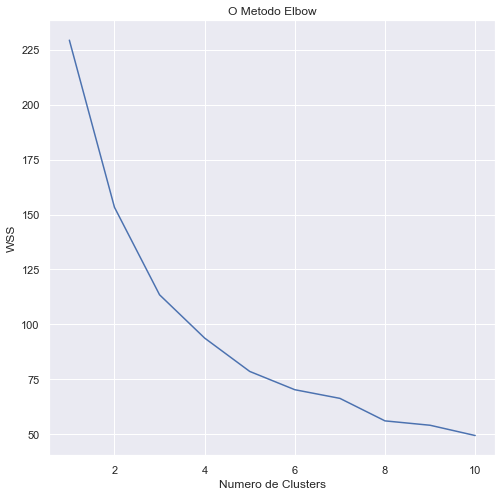

In [28]:
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans

plt.figure(figsize=(8,8))

# plotando o gráfico do método elbow
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares

In [29]:
#vamos tentar 4 a 6 clusters
#4 clusters

silhouette=[]

for i in np.arange(4,7,1):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit_predict(X)
    score = silhouette_score(X, km.labels_, metric='euclidean')
    print('Silhouette Score: %.3f, ncluster= %.1f' % (score, i))
    silhouette.append(score)
    
#um silhouette score próximo de 1 indica uma boa separação. o valor encontrado aparece muito mais próximo de zero. O que acontece se retirarmos o dummy criado?

Silhouette Score: 0.358, ncluster= 4.0
Silhouette Score: 0.387, ncluster= 5.0
Silhouette Score: 0.399, ncluster= 6.0


In [30]:
df_cervejas.drop(columns=['Verão','Outros',"Inverno","Comemorativa","Colaborativa","Oktoberfest","Não é sazonal","Anual/Safrada","Outono","Natal (Christmas)"], inplace=True)

In [31]:
df_cervejas

,ABV,Nota_Aparencia,Nota_Aroma,Nota_Sensacao,Nota_Conjunto,Nota_Sabor,Temperatura_sup_Cerveja
0,5.0,3,6,3,7,12,7.0
1,4.9,4,7,4,8,15,7.0
2,4.8,3,5,3,6,11,4.0
3,5.0,3,4,3,5,9,4.0
4,5.5,3,4,3,5,10,4.0
...,...,...,...,...,...,...,...
529,4.5,3,5,3,5,11,4.0
530,5.2,4,6,3,7,13,7.0
531,6.9,4,7,4,7,15,7.0
532,5.0,4,6,3,6,13,7.0


In [32]:
X=df_cervejas

scaler = MinMaxScaler()
X= scaler.fit_transform(X)

1 152.94008719233213
2 77.60378446727586
3 55.505035517134075
4 39.882650259807335
5 31.335519093795384
6 26.992117810089624
7 22.89394172605949
8 20.90757340001873
9 19.83354699068273
10 17.782297458789547


Text(0, 0.5, 'WSS')

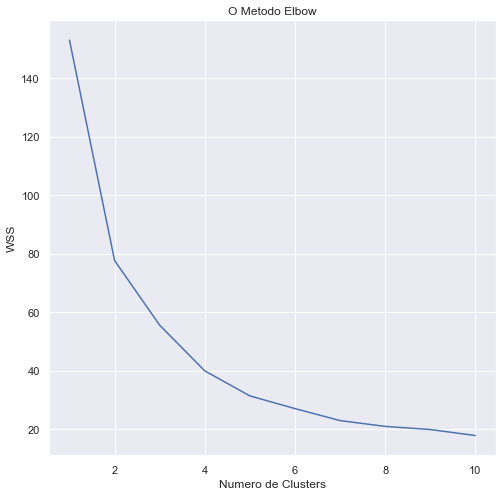

In [33]:
plt.figure(figsize=(8,8))

# plotando o gráfico do método elbow
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares

In [34]:
#vamos tentar 2 a 4 clusters
#4 clusters

silhouette=[]

for i in np.arange(2,5,1):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit_predict(X)
    score = silhouette_score(X, km.labels_, metric='euclidean')
    print('Silhouette Score: %.3f, ncluster= %.1f' % (score, i))
    silhouette.append(score)

Silhouette Score: 0.421, ncluster= 2.0
Silhouette Score: 0.392, ncluster= 3.0
Silhouette Score: 0.416, ncluster= 4.0


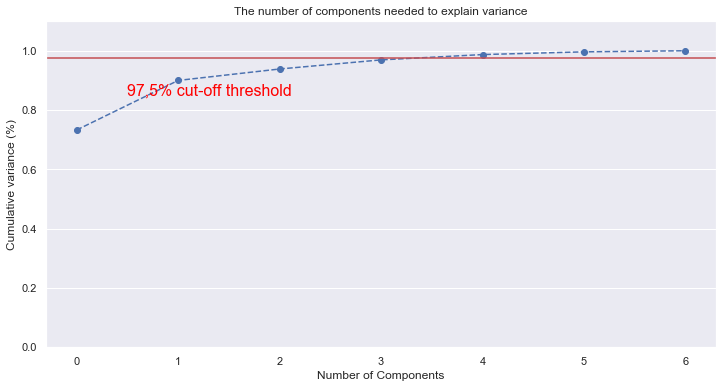

In [35]:
#antes de testar um outro algoritmo de clusterização, vamos tentar uma redução de dimensionalidade para verificar influência na performance

from sklearn.decomposition import PCA

pca = PCA().fit(X)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, 7, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 7, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.975, color='r', linestyle='-')
plt.text(0.5, 0.85, '97,5% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

#3 componentes explicam 98% da variância

In [36]:
X=df_cervejas

scaler = MinMaxScaler()
X= scaler.fit_transform(X)

pca = PCA(n_components = 3)
pca.fit(X)
reduced = pca.transform(X)


pca_df = pd.DataFrame(reduced, columns=['pc1', 'pc2', 'pc3'])
print(pca.explained_variance_ratio_)
pca_df


[0.73285574 0.16698353 0.03860487]


,pc1,pc2,pc3
0,0.117286,0.005550,-0.079575
1,-0.291546,-0.214445,0.069027
2,0.388177,-0.157958,-0.036806
3,0.558473,-0.065234,0.022897
4,0.524832,-0.076719,-0.006018
...,...,...,...
529,0.448857,-0.127476,-0.011347
530,-0.044815,-0.079756,0.158382
531,-0.260547,-0.172885,0.004557
532,0.014574,-0.048792,0.179931


In [38]:

silhouette=[]

for i in np.arange(2,7,1):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit_predict(reduced)
    score = silhouette_score(reduced, km.labels_, metric='euclidean')
    print('Silhouette Score: %.3f, ncluster= %.1f' % (score, i))
    silhouette.append(score)

Silhouette Score: 0.458, ncluster= 2.0
Silhouette Score: 0.450, ncluster= 3.0
Silhouette Score: 0.481, ncluster= 4.0
Silhouette Score: 0.524, ncluster= 5.0
Silhouette Score: 0.460, ncluster= 6.0


In [48]:
#e se tentarmos uns DBSCan?
from sklearn.cluster import DBSCAN
from sklearn import metrics

eps_it=[0.05,0.1,0.2,0.3]
min_samples_it=[4,5,6,7,8]


#Grid Search manual pra encontrar diferentes combinações de hiperparâmetros


for i in eps_it:
    for j in min_samples_it:
        db = DBSCAN(eps=i, min_samples=j).fit(pca_df)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        print("Eps: ",i," Min_Samples: ",j)
        print('Estimated number of clusters: %d' % n_clusters_)
        print('Estimated number of noise points: %d' % n_noise_)
        print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pca_df, labels))
        print(" ")

Eps:  0.05  Min_Samples:  4
Estimated number of clusters: 20
Estimated number of noise points: 84
Silhouette Coefficient: 0.283
 
Eps:  0.05  Min_Samples:  5
Estimated number of clusters: 16
Estimated number of noise points: 101
Silhouette Coefficient: 0.255
 
Eps:  0.05  Min_Samples:  6
Estimated number of clusters: 12
Estimated number of noise points: 124
Silhouette Coefficient: 0.255
 
Eps:  0.05  Min_Samples:  7
Estimated number of clusters: 11
Estimated number of noise points: 139
Silhouette Coefficient: 0.232
 
Eps:  0.05  Min_Samples:  8
Estimated number of clusters: 11
Estimated number of noise points: 141
Silhouette Coefficient: 0.228
 
Eps:  0.1  Min_Samples:  4
Estimated number of clusters: 9
Estimated number of noise points: 30
Silhouette Coefficient: 0.406
 
Eps:  0.1  Min_Samples:  5
Estimated number of clusters: 9
Estimated number of noise points: 30
Silhouette Coefficient: 0.406
 
Eps:  0.1  Min_Samples:  6
Estimated number of clusters: 9
Estimated number of noise point